# **Préparation des Données**



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


# Pour charger la colonne "Technologies".
def charge_technologies(input: str):
  # Creér une liste de technologies, au lieu d'une chaîne de caractères.
  return input.lower().split("/")


# Charge les donées.
data = pd.read_csv("data.csv", decimal=',',
                       converters={"Technologies": charge_technologies})


# Nettoyer et explorer les données un peu.

# Entreprises
data["Entreprise"] = data["Entreprise"].astype("category")
print(f"Entreprises: ({ len(data['Entreprise'].cat.categories.tolist()) })")
print(data["Entreprise"].cat.categories.tolist())
print()

# Metiers
data["Metier"] = data["Metier"].astype("category")
print(f"METIERS: ({ len(data['Metier'].cat.categories.tolist()) })")
print(data["Metier"].cat.categories.tolist())
print()

# Ville
data["Ville"] = data["Ville"].astype("category")
print(f"VILLES: ({ len(data['Ville'].cat.categories.tolist()) })")
print(data["Ville"].cat.categories.tolist())
print()

# Diplome
data["Diplome"] = data['Diplome'].astype("category")
print(f"DIPLOMES: ({ len(data['Diplome'].cat.categories.tolist()) })")
print(data['Diplome'].cat.categories.tolist())
print()

# Technologies (1-hot)
technologies = pd.crosstab((s:=data["Technologies"].explode()).index, s)
technologies = technologies.drop(columns=[""]) # Colonne supplémentaire inutile.
print(f"TECHNOLOGIES: ({len(technologies.columns)})")
print(sorted(technologies))
print()

# Experience
# Imputer des valeurs manquantes avec la moyenne par métier.
data["Experience"] = data["Experience"].fillna(
    data.groupby("Metier")["Experience"].transform('mean')
)
print("EXPERIENCE: (moyennes par métier)")
print(data.groupby("Metier")["Experience"].mean())
print()

data.head(10)

Entreprises: (1382)
['10x Genomics', '1871', '23andMe', '2M Research Services', '3Q Digital', '605', '7Park Data', '84.51°', 'A+E Networks', 'A-Line Staffing', 'AARP', 'AB Sciex Pte', 'ACT Commodities', 'ADP', 'AECOM', 'AFL-CIO', 'AHA American Hospital Association', 'AI/IoT/Blockchain NewCo', 'AIG', 'AIR Worldwide', 'AKCEA Therapeutics', 'ALS TDI', 'AMERICAN CANCER SOCIETY', 'AMP Agency', 'ANALYTICA', 'AP Staffing', 'APTIM', 'ARYZTA Careers', 'ARiA', 'ASRC Federal Holding Company', 'ASTA CRS', 'AXIS Insurance', 'AXS Group LLC', 'AbbVie', 'Abbott Laboratories', 'Abcam', 'Acadian Asset', 'Accelrys, Inc.', 'Accenture', 'AccessLex Institute', 'Acima Spirits', 'Acumen LLC', 'Acuris', 'AdTheorent', 'Adaptive Management', 'Adecco', 'Advanced Decision Vectors, LLC', 'Advanced Micro Devices, Inc.', 'Advanced Sciences and Technologies (AS&T)', 'Advanced Technology Solutions, Inc', 'Advantage SCI', 'Aegerion Pharmaceuticals, Inc.', 'Aegon', 'Aera Technology', 'AeroFarms', 'Aetna', 'Affect Mental 

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,"[matlab, python, pyspark, scikit-learn, tensor...",Master,1.000000,Paris
1,Massachusetts General Hospital(MGH),Data architecte,"[python, java, scala, mongodb]",Master,3.000000,Marseille
2,Delve,Lead data scientist,"[spss, sql, teradata, r, python, tensorflow, s...",Master,3.000000,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,"[c, c++, java, python]",Master,1.500000,Marseille
4,Arm,Data scientist,"[matlab, python, c++, numpy, tensorflow, sciki...",Phd,2.243282,Bordeaux
5,S&P Global Ratings,Lead data scientist,"[vba, python, excel, r]",Master,6.000000,Lille
6,NVIDIA,Data scientist,"[excel, vba, r, python, pyspark]",Bachelor,0.000000,Lille
7,Cedars-Sinai Medical Center,Data scientist,"[java, c, c++, r, python]",Bachelor,4.000000,Toulouse
8,Fibroblast,Data architecte,"[java, linux, docker]",Bachelor,8.000000,Paris
9,General Motors,Data engineer,"[python, java, linux, gnu]",Master,5.000000,Toulouse


# **Analyse Descriptive**

1. Quels sont les statistiques descriptives de base pour la variable Expérience (moyenne,  médiane, écart-type, minimum, maximum)?

In [ ]:
# Montrer les statistiques descriptives pour Expérience.
data["Experience"].describe()

count    9582.000000
mean        2.815366
std         2.703649
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64

```
mean        2.815366
std         2.703649
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
```



2. Proposer une visualisation qui permet de comparer la répartition de l'Expérience par métier.

Une bonne visualisation pour comparer la répartition d'une variable numérique par une variable catégorielle est une boîte à moustaches.

<ipython-input-8-f47dd6beb24a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


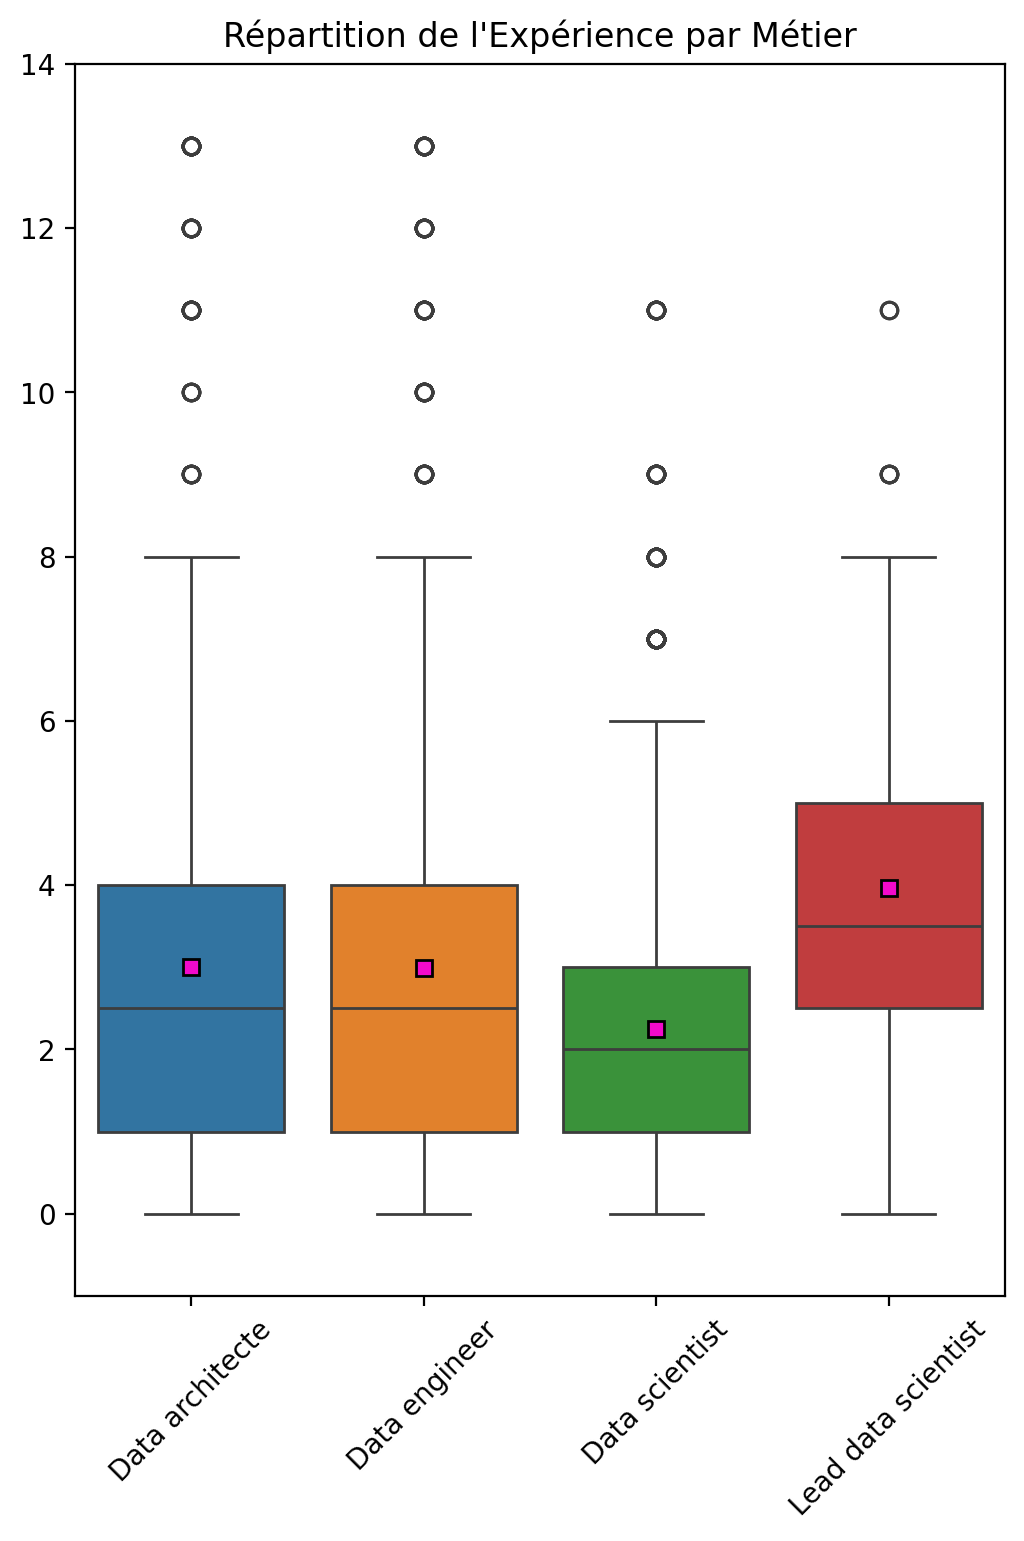

<Figure size 640x480 with 0 Axes>

In [ ]:
# Diviser les données par metier.
experience_par_metier = {
   metier: sub_data["Experience"]
   for metier, sub_data in data.groupby("Metier")
}

# Montrer les données dans une boîte à moustaches.
fig = plt.figure(figsize=(6, 8), dpi=200)
axes = sb.boxplot(
    data=experience_par_metier,
    showmeans=True,
    meanprops={"marker":"s",
               "markerfacecolor":"#f20acb",
               "markeredgecolor":"black"
               }
)

axes.set_title("Répartition de l'Expérience par Métier")
# Note: il y a des gros valeurs comme 20 ans, mais c'est plus
# important que les boîtes sont lisibles.
axes.set_ylim([-1, 14])
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
fig.add_axes(axes)
plt.show()
plt.savefig("repartition_experience.png")

3. Proposer une visualisation illustrant les cinq technologies les plus couramment utilisées.

On peut faire un graphique à barres montrant les proportions de candidats qui utilisent chaque technologie.

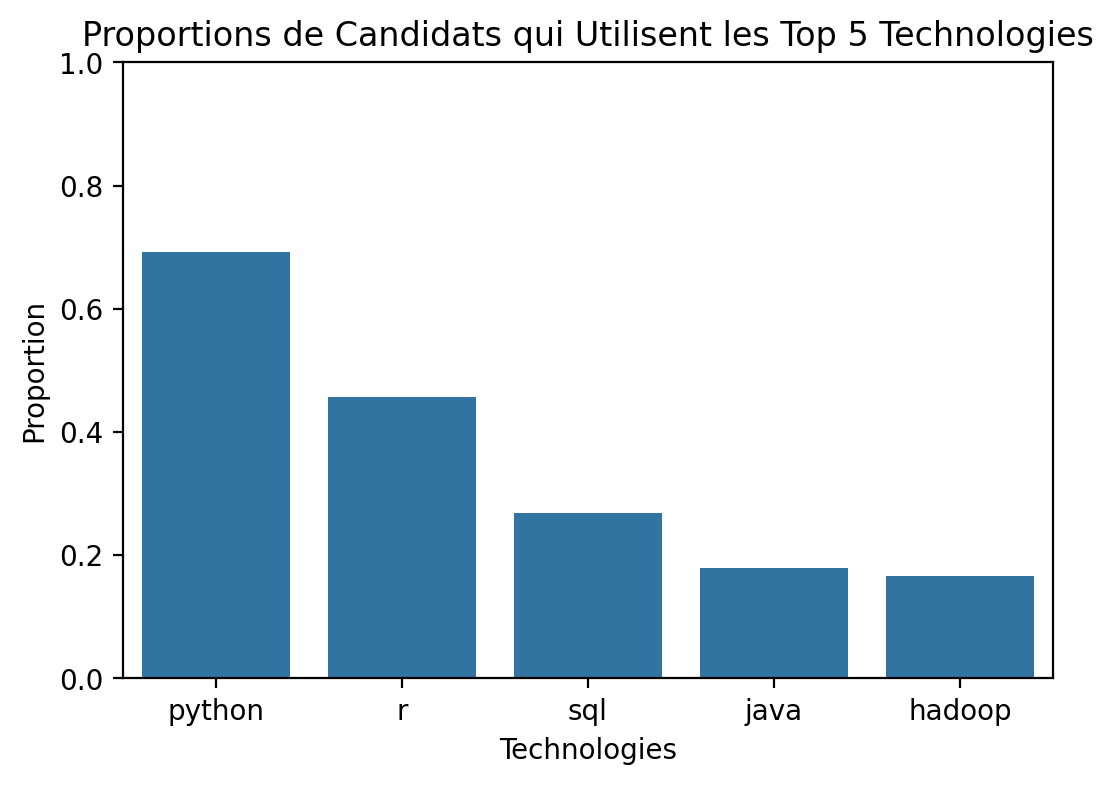

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compter les technologies.
tech_counts = technologies.sum(axis=0)
tech_proportions = tech_counts.sort_values(ascending=False) / len(data)
tech_top_5 = tech_proportions[0:5]

# Montrer les proportions dans un graphique à barres.
fig = plt.figure(figsize=(6, 4), dpi=200)
axes = sb.barplot(data=tech_top_5)
axes.set_title("Proportions de Candidats qui Utilisent les Top 5 Technologies")
axes.set_ylim([0, 1])
axes.set_ylabel("Proportion")
fig.add_axes(axes)
plt.show()
plt.savefig("proportion_technologies.png")

# **Feature Engineering**

1. Transformer la variable Expérience en variable catégorielle à 4 modalités: débutant, confirmé, senior, et expert.

In [ ]:
# J'utilise les 4 quantiles pour catégoriser les données de l'Expérience.
# D'autres règles sont possibles.
data["Experience_Cat"] = pd.qcut(
    data["Experience"],
    q=4,
    labels=["debutant", "confirme", "senior", "expert"]
)

data.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Experience_Cat
0,Sanofi,Data scientist,"[matlab, python, pyspark, scikit-learn, tensor...",Master,1.000000,Paris,debutant
1,Massachusetts General Hospital(MGH),Data architecte,"[python, java, scala, mongodb]",Master,3.000000,Marseille,senior
2,Delve,Lead data scientist,"[spss, sql, teradata, r, python, tensorflow, s...",Master,3.000000,Nantes,senior
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,"[c, c++, java, python]",Master,1.500000,Marseille,confirme
4,Arm,Data scientist,"[matlab, python, c++, numpy, tensorflow, sciki...",Phd,2.243282,Bordeaux,senior
5,S&P Global Ratings,Lead data scientist,"[vba, python, excel, r]",Master,6.000000,Lille,expert
6,NVIDIA,Data scientist,"[excel, vba, r, python, pyspark]",Bachelor,0.000000,Lille,debutant
7,Cedars-Sinai Medical Center,Data scientist,"[java, c, c++, r, python]",Bachelor,4.000000,Toulouse,expert
8,Fibroblast,Data architecte,"[java, linux, docker]",Bachelor,8.000000,Paris,expert
9,General Motors,Data engineer,"[python, java, linux, gnu]",Master,5.000000,Toulouse,expert


2. Est-ce que la variable Entreprise est pertinente dans une approche de machine learning? Si non, proposer une approche pour la rendre pertinente.

Non, la variable Entreprise n'est pas pertinente. Raisons:

(1) En tant que variable catégorielle, il y a trop de catégories et pas assez d'exemples de chacune pour être utile. (Il y a 1382 entreprises et 10000 candidats, alors < 10 candidats par entreprise en moyenne.)

(2) Les métiers sont probablement indépendantes des entreprises, parce qu'une entreprise emploie des personnes de toutes les métiers. Ce serait bizarre, qu'une entreprise n'emploie que des data architectes et rien d'autres métiers.

Je pense les variables "Entreprise" et "Métier" sont indépendante, donc rien ne peut être fait qui rendrait "Entreprise" utile pour le ML supervisé. Cependant, s'il existe réellement une corrélation, je propose de regrouper les données pour "Entreprise" en quelques catégories selon le type de travail effectué par l'entreprise. Cela réduit le nombre de catégories de 1382 à quelque chose de plus petit, comme 100.

# **ML Supervisé**

En premier, je prépare les données pour le ML Supervisé. Je transforme toutes les variables catégorielles avec one-hot-encoding. Je sépare les données en étiquetées et non étiquetées.

In [ ]:
# Transformer les données pour avoir des types plus utiles pour ML supervisé.
labeled_index = data["Metier"].notnull()
data_labeled = data[labeled_index]
data_unlabeled = data[~labeled_index]

data_supervised = pd.DataFrame(index=data_labeled.index)

# Metier ---> 1-hot
data_supervised = data_supervised.join(
    pd.get_dummies(data_labeled["Metier"], dtype="int64")
)

# Ville ---> 1-hot
data_supervised = data_supervised.join(
    pd.get_dummies(data_labeled["Ville"], dtype="int64")
)

# Diplome ---> 1-hot
data_supervised = data_supervised.join(
    pd.get_dummies(data_labeled["Diplome"], dtype="int64")
)

# Technologies (déjà 1-hot)
data_supervised = data_supervised.join(technologies[labeled_index])

# Experience ---> 1-hot
data_supervised = data_supervised.join(
    pd.get_dummies(data_labeled["Experience_Cat"], dtype="int64")
)

data_labeled.info()
print()
data_unlabeled.info()
print()
data_supervised.info()
print()
data_supervised.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 9563 entries, 0 to 9581
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Entreprise      9546 non-null   category
 1   Metier          9563 non-null   category
 2   Technologies    9563 non-null   object  
 3   Diplome         9563 non-null   category
 4   Experience      9563 non-null   float64 
 5   Ville           9563 non-null   category
 6   Experience_Cat  9563 non-null   category
dtypes: category(5), float64(1), object(1)
memory usage: 582.5+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 346 to 9490
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Entreprise      19 non-null     category
 1   Metier          0 non-null      category
 2   Technologies    19 non-null     object  
 3   Diplome         19 non-null     category
 4   Experience      19 non-null     flo

,Data architecte,Data engineer,Data scientist,Lead data scientist,Bordeaux,Grenoble,Lille,Lyon,Marseille,Montpellier,...,tensorflow,teradata,vba,vertica,windows,yarn,debutant,confirme,senior,expert
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Les données étiquetées sont divisées en ensembles d'entraînement et de test. Toutes les données sont 1-hot (0/1) alors il n'y a pas de raison pour faire de la normalisation.

In [ ]:
# 5% test, 95% train.
# random_state = 525 is the seed for the RNG.
# Stratified sample: preserve the proportions of each metier in train/test.
data_by_metier = data_labeled.groupby("Metier")
sample_index = data_by_metier.sample(frac=0.945, random_state=525).index
sample_mask = data_supervised.index.isin(sample_index)
data_supervised_train = data_supervised[sample_mask]
data_supervised_test = data_supervised[~sample_mask]


# Sanity check for stratified sampling.
train_metiers = data_labeled[sample_mask]
test_metiers = data_labeled[~sample_mask]
print("\nTrain Data Metier Distribution")
print(train_metiers['Metier'].value_counts() / len(train_metiers))
print("\nTest Data Metier Distribution")
print(test_metiers['Metier'].value_counts() / len(test_metiers))
print("\nLabeled Data Metier Distribution")
print(data_labeled['Metier'].value_counts() / len(data_labeled))
print()


print(f"TRAIN: {len(data_supervised_train)} exemples")
print(f"TEST: {len(data_supervised_test)} exemples")

train_x = data_supervised_train.iloc[:, 4:].to_numpy()
train_y = data_supervised_train.iloc[:, :4].to_numpy()
test_x = data_supervised_test.iloc[:, 4:].to_numpy()
test_y = data_supervised_test.iloc[:, :4].to_numpy()

data_supervised_train.head(10)


Train Data Metier Distribution
Metier
Data scientist         0.404161
Data engineer          0.245463
Data architecte        0.222001
Lead data scientist    0.128375
Name: count, dtype: float64

Test Data Metier Distribution
Metier
Data scientist         0.404175
Data engineer          0.244782
Data architecte        0.222011
Lead data scientist    0.129032
Name: count, dtype: float64

Labeled Data Metier Distribution
Metier
Data scientist         0.404162
Data engineer          0.245425
Data architecte        0.222001
Lead data scientist    0.128412
Name: count, dtype: float64

TRAIN: 9036 exemples
TEST: 527 exemples


,Data architecte,Data engineer,Data scientist,Lead data scientist,Bordeaux,Grenoble,Lille,Lyon,Marseille,Montpellier,...,tensorflow,teradata,vba,vertica,windows,yarn,debutant,confirme,senior,expert
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Maintenant je fais le ML supervisé. Je fait une régression logistique multi-classes:

$$p(y|x) = \text{Cat(softmax}(W^\top x + b))$$

La fonction objectif est cross-entropy (de MLE):

$$ L(y, \hat{y}) = \frac1n \sum_{i=1}^n H(y_i, \hat{y}_i)
= -\frac1n \sum_{i=1}^n \sum_{j=1}^4 y_i[j] \log(\hat{y}_i[j])$$

(J'ajoute aussi L2 régularisation, $\lambda \lVert W \rVert^2_F$)

Definir les matrices suivantes ($n =$ # exemples, et $d = $ # features):

$X = $ $n$ by $d$ design matrix

$y = $ $n$ by $4$ label matrix (1-hot)

$\hat{y} = $ $n$ by $4$ predictions matrix (probability vectors)

On peut montrer que les gradients de la fonction objectif sont:

$$\nabla_W L = \frac1n X^\top (\hat{y} - y) + 2\lambda W$$

$$\nabla_b L = \frac1n (\hat{y} - y)^\top 1_n$$

J'utilise gradient descent pour l'optimisation.

Ce sont des fonctions utilisé pendant l'entraînement:

In [ ]:
# Calculer le logarithme des predictions.
# (C'est utile pour calculer la fonction objectif.)
def log_predictions(W: np.ndarray,
                    b: np.ndarray,
                    X: np.ndarray) -> np.ndarray:
  """

  Args:
    W: (d, 4) weight matrix
    b: (4, 1) offset ("bias") vector
    X: (n, d) design matrix

  Returns: Le logarithme de y-hat (n, 4) prediction matrix

  """

  logits = W.T @ X.T + b
  max = np.max(logits, axis=0).reshape(1, -1)
  # log-sum-exp trick for stability of softmax.
  LSE = max + np.log(np.sum(np.exp(logits - max), axis=0))
  log_y_hat = logits - LSE
  return log_y_hat.T


# Calculer les predictions.
def predict(W: np.ndarray,
            b: np.ndarray,
            X: np.ndarray) -> np.ndarray:
  """

  Args:
    W: (d, 4) weight matrix
    b: (4, 1) offset ("bias") vector
    X: (n, d) design matrix

  Returns: y-hat (n, 4) prediction matrix

  """

  return np.exp(log_predictions(W, b, X))


# Calculer la fonction objectif (cross-entropy).
def loss(W: np.ndarray,
         b: np.ndarray,
         X: np.ndarray,
         y: np.ndarray,
         reg: float) -> float:
  """

  Args:
    W: (d, 4) weight matrix
    b: (4, 1) offset ("bias") vector
    X: (n, d) design matrix
    y: (n, 4) label matrix
    reg: hyperparamètre de régularisation (float >= 0)

  Returns: la fonction objectif L (régularisé).

  """

  n, _ = X.shape

  cross_entropy = -(y * log_predictions(W, b, X)).sum() / n
  regularizer = 2 * reg * np.linalg.norm(W, ord='fro')**2
  return cross_entropy + regularizer


# Calculer les gradients de la fonction objectif.
def gradients(W: np.ndarray,
              b: np.ndarray,
              X: np.ndarray,
              y: np.ndarray,
              reg: float):
  """

  Args:
    W: (d, 4) weight matrix
    b: (4, 1) offset ("bias") vector
    X: (n, d) design matrix
    y: (n, 4) label matrix
    reg: hyperparamètre de régularisation (float >= 0)

  Returns: les gradients wrt W et wrt b de la fonction objectif.

  """

  n, _ = X.shape

  y_hat = predict(W, b, X)
  grad_W = X.T @ (y_hat - y) / n
  grad_b = np.sum((y_hat - y).T, axis=1).reshape(-1, 1) / n
  return (grad_W, grad_b)


def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
  """

  Args:
    y: (n, 4) label matrix
    y_hat: (n, 4) predictions matrix (probability vectors)

  Returns: la précision des prédictions vs. labels (pour cent)

  """

  n, _ = y.shape

  diff = (np.argmax(y, axis=1) - np.argmax(y_hat, axis=1))
  return 1 - np.count_nonzero(diff) / n


Voici l'êntrainement et cross-validation.

In [ ]:
# Train the model with gradient descent.
def train(X: np.ndarray,
          y: np.ndarray,
          reg: float,
          max_iter=10000,
          delta=1e-5):
  """

  Args:
    X: (n, d) design matrix
    y: (n, 4) label matrix
    reg: hyperparamètre de régularisation (float >= 0)
    max_iter: nombre maximum d'itérations pour gradient descent.
    delta: convergence criteria (stop when loss changes < delta)

    Returns: trained weight et offset paramètres, W et b,
              et une liste de la fonction objectif à chaque étape.

  """

  # Learning rate
  alpha = 1.0

  n, d = X.shape
  n, num_cat = y.shape
  W = np.zeros(shape=(d, num_cat))
  b = np.zeros(shape=(num_cat, 1))

  # Initial gradient step.
  losses = [loss(W, b, X, y, reg)]
  W_grad, b_grad = gradients(W, b, X, y, reg)
  W = W - alpha * W_grad
  b = b - alpha * b_grad
  current_loss = loss(W, b, X, y, reg)
  losses.append(current_loss)

  iter = 0

  # Training loop.
  while ((losses[-2] - losses[-1]) > delta) and iter < max_iter:

    W_grad, b_grad = gradients(W, b, X, y, reg)
    W = W - alpha * W_grad
    b = b - alpha * b_grad
    current_loss = loss(W, b, X, y, reg)
    losses.append(current_loss)

    iter = iter + 1
    # print(f"LOSS: {current_loss}")

  return W, b, losses


# Visualiser la fonction objectif pendant l'entraînement
def plot_loss(losses):
  """

  Args:
    losses: liste de la fonction objectif pendant l'entraînement.

  """

  plt.plot(losses)
  plt.title("Fonction Objectif vs. Époques")
  plt.xlabel("Époques")
  plt.ylabel("Fonction Objectif")
  plt.show()


# Calculer k-fold cross validation pour l'hyperparamètre de régularisation.
def cross_validation(
    X: np.ndarray,
    y: np.ndarray,
    reg: float,
    num_folds: int) -> float:
    """

    Args:
      X: (n, d) design matrix
      y: (n, 4) label matrix
      reg: hyperparamètre de régularisation (float >= 0)
      num_folds: nombre de folds (int)

    Returns: k-fold cross-validation accuracy (float)

    """

    n, _ = X.shape
    permutation = np.random.permutation(n)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    folds_x = np.array_split(X_shuffled, num_folds)
    folds_y = np.array_split(y_shuffled, num_folds)

    fold_errors = np.zeros(num_folds)

    for i in range(num_folds):

        # Choose validation and train set.
        # These are python lists so + is concatenation. Skips i-th fold.

        val_x = folds_x[i]
        val_y = folds_y[i]
        train_x_list = folds_x[0:i] + folds_x[i+1:]
        train_y_list = folds_y[0:i] + folds_y[i+1:]

        # Concatenate arrays in our lists into one numpy array.
        CV_train_x = np.concatenate(train_x_list)
        CV_train_y = np.concatenate(train_y_list)

        # Train the model and compute validation accuracy.
        # (Limited # of iterations, for speed)
        W, b, _ = train(CV_train_x, CV_train_y, reg, max_iter=50, delta=1e-4)
        val_y_hat = predict(W, b, val_x)
        fold_errors[i] = accuracy(val_y, val_y_hat)

    return fold_errors.mean()



Voici le pipeline principal. Je cherche des paramètres de régularisation entre 1e-4 et 1e-12. (Un peu d'essai et erreur a montré que des valeurs plus grandes comme 1e-2, etc, ne sont pas bons).

CV accuracy for reg = 0.1: 0.6551619968835445
CV accuracy for reg = 0.03324597932270942: 0.7270889071825478
CV accuracy for reg = 0.011052951411260215: 0.7709163898117387
CV accuracy for reg = 0.003674661940736688: 0.8208281882417507
CV accuracy for reg = 0.0012216773489967918: 0.8474975254559531
CV accuracy for reg = 0.00040615859883769796: 0.845502209939337
CV accuracy for reg = 0.00013503140378698722: 0.8466148972451709
CV accuracy for reg = 4.489251258218608e-05: 0.8469461431413479
CV accuracy for reg = 1.492495545051829e-05: 0.8449554827075921
CV accuracy for reg = 4.9619476030028976e-06: 0.8478318339066435
CV accuracy for reg = 1.6496480740980207e-06: 0.8462807112966612
CV accuracy for reg = 5.484416576121015e-07: 0.8441779613677124
CV accuracy for reg = 1.8233480008684387e-07: 0.8459465253481511
CV accuracy for reg = 6.061898993497573e-08: 0.8445123923205834
CV accuracy for reg = 2.015337685941731e-08: 0.8456154019541549
CV accuracy for reg = 6.700187503509577e-09: 0.84705443506

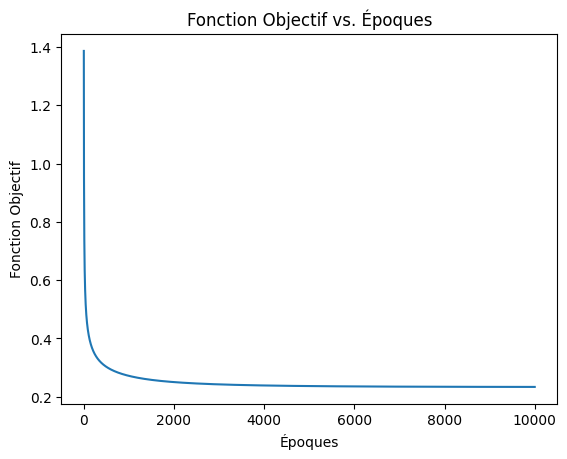

Exemple Label/Prediction
[0 1 0 0]
[0.00034433 0.99965554 0.0000001  0.00000003]

Train Accuracy: 0.8966356795042054
Test Accuracy: 0.9070208728652751


In [ ]:
np.set_printoptions(suppress=True)

# Search: 1e-4 to 1e-12
regs = np.logspace(-1, -12, 24)
CV_accuracy = np.zeros(24)
for i in range(24):
    # 10-fold cross validation.
    CV_accuracy[i] = cross_validation(train_x, train_y, regs[i], 10)
    print(f"CV accuracy for reg = {regs[i]}: {CV_accuracy[i]}")

# Choose best regularization.
best_index = np.argmax(CV_accuracy)
best_reg = regs[best_index]
print(f"Optimal Regularization: {best_reg}")
print(f"with CV accuracy {CV_accuracy[best_index]}")

# Final training.
W, b, losses = train(train_x, train_y, reg=best_reg, delta=1e-7)

plot_loss(losses)
train_y_hat = predict(W, b, train_x)
test_y_hat = predict(W, b, test_x)

print("Exemple Label/Prediction")
print(train_y[666])
print(train_y_hat[666])
print()

print(f"Train Accuracy: {accuracy(train_y, train_y_hat)}")
print(f"Test Accuracy: {accuracy(test_y, test_y_hat)}")

Je pense qu'une précision de 89 % est plutôt bonne pour un classificateur linéaire entraîné en 5 minutes.
Maintenant, j'inspecte le weight matrix $W$ pour apprendre que sont les features plus pertinents.

In [ ]:
# Mask smaller entries to 0 so that we may see the big entries easier.
# (Find features which have a weight >= 1.)
important_features = (np.max(np.abs(W), axis=1) >= 1)
print("IMPORTANT FEATURE WEIGHTS: ")
print(W * important_features.reshape(-1, 1))
print()

# Remind ourselves of the features respresented in each row of W.
features = np.array(data_supervised_train.iloc[:, 4:].columns.tolist())
print("ALL FEATURES: ")
print(features)
print()

# Print the important features (weight >= 1)
print("IMPORTANT FEATURES")
print(features[important_features.reshape(-1)])



IMPORTANT FEATURE WEIGHTS: 
[[ 0.         -0.         -0.         -0.        ]
 [ 0.66519477  0.02647144  0.37603276 -1.06769896]
 [ 0.          0.         -0.         -0.        ]
 [ 0.         -0.         -0.         -0.        ]
 [ 0.         -0.         -0.         -0.        ]
 [ 0.          0.          0.         -0.        ]
 [-0.         -0.         -0.          0.        ]
 [ 0.          0.         -0.         -0.        ]
 [-0.         -0.          0.          0.        ]
 [-0.         -0.          0.          0.        ]
 [ 0.         -0.         -0.         -0.        ]
 [ 0.         -0.         -0.          0.        ]
 [ 0.          0.         -0.         -0.        ]
 [-0.         -0.          0.          0.        ]
 [ 1.01083102 -0.1456492  -0.5468506  -0.31833122]
 [ 0.         -0.         -0.         -0.        ]
 [ 1.53723087  0.59329104 -1.02952226 -1.10099965]
 [-0.         -0.          0.          0.        ]
 [-0.         -0.          0.         -0.        ]
 [-

Come on peut s'y attendre, les features pour "Ville" ne sont pas très utiles, et le modèle s'est plutôt concentré sur les technologies.


Enfin, je complète les données en prédisant les métiers pour les exemples non étiquetés.

In [ ]:
data_unlabeled_predictors = pd.DataFrame(index=data_unlabeled.index)

# Ville ---> 1-hot
data_unlabeled_predictors = data_unlabeled_predictors.join(
    pd.get_dummies(data_unlabeled["Ville"], dtype="int64")
)

# Diplome ---> 1-hot
data_unlabeled_predictors = data_unlabeled_predictors.join(
    pd.get_dummies(data_unlabeled["Diplome"], dtype="int64")
)

# Technologies (déjà 1-hot)
data_unlabeled_predictors = data_unlabeled_predictors.join(
    technologies[~labeled_index]
)

# Experience ---> 1-hot
data_unlabeled_predictors = data_unlabeled_predictors.join(
    pd.get_dummies(data_unlabeled["Experience_Cat"], dtype="int64")
)

# Predict labels.
unlabeled_x = data_unlabeled_predictors.to_numpy()
predicted_label_codes = np.argmax(predict(W, b, unlabeled_x), axis=1)

# Turn digits (0, 1, 2, 3) into categories.
cats = data_unlabeled["Metier"].cat.categories.to_list()
cat_map = {
    i: cats[i]
    for i in range(len(cats))
}
data_unlabeled = data_unlabeled.assign(Metier=predicted_label_codes)
data_unlabeled["Metier"] = data_unlabeled["Metier"].map(cat_map)
data_unlabeled["Metier"] = data_unlabeled["Metier"].astype("category")

# Merge labeled and unlabeled data.
data.info()
print()
data = pd.concat([data_labeled, data_unlabeled])
data.info()
print()

data_unlabeled.info()
data_unlabeled.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Entreprise      9565 non-null   category
 1   Metier          9563 non-null   category
 2   Technologies    9582 non-null   object  
 3   Diplome         9582 non-null   category
 4   Experience      9582 non-null   float64 
 5   Ville           9582 non-null   category
 6   Experience_Cat  9582 non-null   category
dtypes: category(5), float64(1), object(1)
memory usage: 250.3+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9490
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Entreprise      9565 non-null   category
 1   Metier          9582 non-null   category
 2   Technologies    9582 non-null   object  
 3   Diplome         9582 non-null   category
 4   Experience      9582 non-null 

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Experience_Cat
346,Jacobs,Data engineer,"[python, spark, gnu, linux]",No diploma,2.5,Paris,senior
2058,Ball Aerospace,Lead data scientist,"[vba, python, excel, r]",Master,15.0,Lyon,expert
2670,"eHire, LLC",Data scientist,"[java, c, c++, r, python]",Master,1.5,Toulouse,confirme
2899,Norfolk Southern Corp,Data scientist,"[python, tensorflow, scikit-learn, deep learni...",Phd,0.0,Grenoble,debutant
3346,J.E. Ranta Associates,Data architecte,"[cassandra, mongodb, nosql, aws]",Master,7.0,Rennes,expert
4248,KPMG,Data scientist,"[python, microsoft azure, r, sql]",Phd,2.0,Lyon,confirme
4290,"Pandora Media, Inc.",Data scientist,"[sas, teradata, sql, r, python, machine learni...",Phd,1.5,Toulouse,confirme
4292,Partners HealthCare(PHS),Lead data scientist,"[sas, teradata, sql, r, python, machine learni...",Master,8.0,Bordeaux,expert
5425,Ashton Lane Group,Data engineer,"[python, pyspark, spark]",No diploma,5.0,Lyon,expert
5593,Lighthouse Lab Services,Data scientist,"[python, r, machine learning, excel, vba, c++]",Master,3.0,Lyon,senior


# **ML Non-Supervisé**

Je prépare les données pour le ML non-supervisé, en transformant les variables catégorielles en codes.

In [ ]:
# Transformer les données pour le ML non-supervisé.

data_unsupervised = pd.DataFrame(index=data.index)

# Metier ---> integer codes
data_unsupervised = data_unsupervised.join(
    pd.Series(data["Metier"].cat.codes, name="Metier")
)

# Ville ---> integer codes
data_unsupervised = data_unsupervised.join(
    pd.Series(data["Ville"].cat.codes, name="Ville")
)

# Diplome ---> integer codes
data_unsupervised = data_unsupervised.join(
    pd.Series(data["Diplome"].cat.codes, name="Diplome")
)

# Technologies (déjà 1-hot)
data_unsupervised = data_unsupervised.join(technologies)

# Experience ---> integer codes
data_unsupervised = data_unsupervised.join(
    pd.Series(data["Experience_Cat"].cat.codes, name="Experience")
)

features = data_unsupervised.to_numpy()

data_unsupervised.head(10)

,Metier,Ville,Diplome,ai,anglais,aws,big data,c,c++,cassandra,...,spss,sql,tableau,tensorflow,teradata,vba,vertica,windows,yarn,Experience
0,2,8,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,3,6,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,2
3,2,4,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,3,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2
5,3,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
6,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,2,13,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3
8,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,1,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


Je fais $k$-modes clustering, avec la fonction objectif:

$$L(\mu, C) = \frac1n ~\sum_{m=1}^k ~\sum_{i:~C[i]=m} ~ \lVert \mu_m - x_i \rVert_0$$

ou les matrices $\mu$ et $C$ sont définis: ($n =$ # exemples, et $d = $ # features)

$\mu = $ $k$ by $d$ centers matrix (each row is a center)

$C = $ $n$ by $1$ classifications vector

J'utilise EM pour l'optimisation -- classer les données $x_i$ par la (L0) distance aux centres, et puis déplacer chaque centre vers le mode de ses points. Pour choisir le nombre de clusters (validation), j'utilise le Silhouette Score.

\\
Ce sont des fonctions utilisé pendant l'entraînement:

In [ ]:
from scipy import stats

# Calculer les nouveaux centres avec les classifications.
def calculate_centers(
    X: np.ndarray,
    classifications: np.ndarray,
    num_centers: int) -> np.ndarray:
    """

    Args:
        X: (n, d) feature matrix
        classifications: (n,) classifications vector
        num_centers (int): nombre de centres

    Returns: new centers matrix (k, d)

    """

    n, d = X.shape
    centers = np.zeros(shape=(num_centers, d))

    for i in range(num_centers):

        idx = np.where(classifications == i)
        centers[i] = stats.mode(X[idx], axis=0)[0]

    return centers


# Classer les données par la distance aux centres.
def cluster_data(X: np.ndarray,
                 centers: np.ndarray) -> np.ndarray:
    """

    Args:
        X: (n, d) feature matrix
        centers: (k, d) centers matrix

    Returns: classifications vector (n,)

    """

    # n by k matrix. D_ij = distance of x_i to center_j
    diff = X[:, :, None] - centers[None, :, :].transpose(0, 2, 1)
    distances = np.linalg.norm(diff, ord=0, axis=1)

    return np.argmin(distances, axis=1)


# Calculer la fonction objectif.
def calculate_error(X: np.ndarray,
                    centers: np.ndarray) -> float:
    """

    Args:
        X: (n, d) feature matrix
        centers: (k, d) centers matrix

    Returns: la fonction objectif (float)

    """

    # n by k matrix. D_ij = distance of x_i to center_j
    diff = X[:, :, None] - centers[None, :, :].transpose(0, 2, 1)
    distances = np.linalg.norm(diff, ord=0, axis=1)

    return np.min(distances, axis=1).mean()

Voici l'optimisation et la validation.

In [ ]:
# K-modes algorithm.
def k_modes(
    X: np.ndarray,
    num_centers: int,
    delta: float = 1e-3):
    """

    Args:
        X: (n, d) features matrix
        num_centers: nombre de centres
        delta: convergence criteria (stop when changes < delta)

    Returns: centers matrix (k, d), classifications vector (n,) ,
             et une list de la fonction objectif

    """

    n, _ = X.shape

    idx = np.random.choice(n, size=num_centers, replace=False)
    centers = X[idx]
    prev_centers = centers
    errors = []


    # Fencepost first step.
    classifications = cluster_data(X, prev_centers)
    centers = calculate_centers(X, classifications, num_centers)
    error = calculate_error(X, centers)
    errors.append(error)
    cauchy_error = np.max(np.abs(centers - prev_centers)).item()
    prev_centers = centers

    while cauchy_error > delta:

        classifications = cluster_data(X, prev_centers)
        centers = calculate_centers(X, classifications, num_centers)
        error = calculate_error(X, centers)
        errors.append(error)
        cauchy_error = np.max(np.abs(centers - prev_centers)).item()
        prev_centers = centers


    return centers, classifications, errors


# Calculate the Silhouette Score of a clustering.
def silhouette(X: np.ndarray,
               classifications: np.ndarray,
               num_centers: float) -> float:
    """

    Args:
        X: (n, d) features matrix
        classifications: (n,) classifications vector
        num_centers: nombre de centres


    Returns: The mean silhouette coefficient of the clustering.

    """

    n, _ = X.shape

    # Silhouette score is expensive, so sample 1000 data points.
    idx = np.random.choice(n, size=1000, replace=False)
    X = X[idx]
    classifications = classifications[idx]

    n, _ = X.shape

    # n by n matrix. D_ij = distance of x_i to x_j
    diff = X[:, :, None] - X[None, :, :].transpose(0, 2, 1)
    distances = np.linalg.norm(diff, ord=0, axis=1)

    # Find the indices for each cluster.
    cluster_masks = [classifications == j for j in range(num_centers)]

    # n by k matrix. S_ij = sum of the distances of point x_i to
    # all of the points in cluster j.
    distance_sums = np.zeros(shape=(n, num_centers))
    for j in range(num_centers):
        distance_sums[:, j] = np.sum(distances, axis=1, where=cluster_masks[j])


    # Calculate the denominators to divide distances by.
    cluster_size = [cluster_masks[j].sum() for j in range(num_centers)]
    self_center_offset = np.zeros(shape=(n, num_centers))
    self_center_offset[np.arange(n), classifications] = 1
    denominator = np.tile(np.array(cluster_size), (n, 1))
    denominator = denominator - self_center_offset

    # n by k matrix. A_ij = mean distance of point x_i to
    # all of the points in cluster j. If x_i belongs to cluster j,
    # then the entry is the mean distance of point x_i to all OTHER
    # points in cluster j, NOT including itself.
    average_dist = distance_sums / denominator


    # Calculate the "a_i" values for silhouette score.
    # "alienation" of the data point to its own cluster.
    a_coeff = average_dist[np.arange(n), classifications]

    # Calculate the "b_i" values for silhouette score.
    # Set distance to own cluster to +infinity to exclude from min operation
    average_dist[np.arange(n), classifications] = np.inf
    # "separation" of the data point to its nearest neighboring cluster.
    b_coeff = np.min(average_dist, axis=1)

    # Calculate silhouette coefficients.
    sil_coeff = (b_coeff - a_coeff) / np.maximum(a_coeff, b_coeff)
    sil_coeff = np.nan_to_num(sil_coeff) # Replace NaN with 0 (neutral score)


    return sil_coeff.mean()


Voici le pipeline principal. Je cherche des nombres de clusters entre 4 et 30.

k = 4: Loss = 5.476309747443122, Score = 0.1386253691349398
k = 5: Loss = 5.200480066791902, Score = 0.19366798768599755
k = 6: Loss = 5.018680859945731, Score = 0.20208872944444783
k = 7: Loss = 4.876748069296598, Score = 0.19598402677727805
k = 8: Loss = 4.748173658943853, Score = 0.18193884076840952
k = 9: Loss = 4.63149655604258, Score = 0.24824325033143582
k = 10: Loss = 4.4660822375287, Score = 0.2283803839133383
k = 11: Loss = 4.285117929451054, Score = 0.2420896167301118
k = 12: Loss = 4.326027969108746, Score = 0.22479262181958298
k = 13: Loss = 4.219056564391567, Score = 0.23078342589840697
k = 14: Loss = 4.097578793571279, Score = 0.19810012109970834
k = 15: Loss = 3.978501356710499, Score = 0.23262413138731908
k = 16: Loss = 3.88300981006053, Score = 0.24131487247575698
k = 17: Loss = 3.787831350448758, Score = 0.2831777346989927
k = 18: Loss = 3.7691504905030264, Score = 0.2435987462677372
k = 19: Loss = 3.7842830306825297, Score = 0.24480946023442934
k = 20: Loss = 3.5683

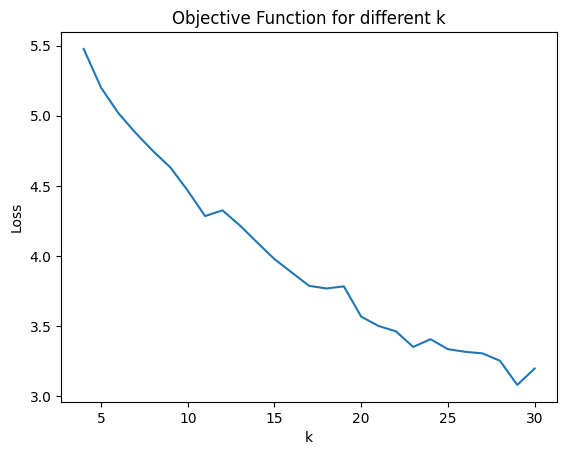

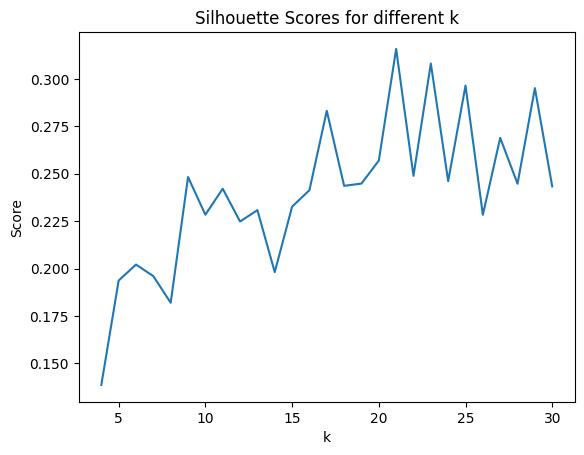

In [ ]:
# Search: k = 4 to 30
results = []
losses = []
silhouette_scores = np.zeros(27)

for k in range(4, 31):

    # K-modes varies a lot depending on initialization,
    # so I run it 20 times at each k and choose the best run.
    run_losses = np.zeros(20)
    run_results = []
    for j in range(20):
      clustering = k_modes(features, k)
      run_results.append(clustering)
      run_losses[j] = clustering[2][-1]

    best_run_idx = np.argmin(run_losses)
    best_run_loss = run_losses[best_run_idx]
    best_run = run_results[best_run_idx]

    results.append(best_run)
    losses.append(best_run_loss)
    score = silhouette(features, best_run[1], k)
    silhouette_scores[k - 4] = score
    print(f"k = {k}: Loss = {best_run_loss}, Score = {score}")


best_k_ind = np.argmax(silhouette_scores)
best_k = best_k_ind + 4
best_clustering = results[best_k_ind]
print(f"Optimal Number of Clusters: k = {best_k}")
print(f"with Silhouette Score of {silhouette_scores[best_k_ind]}")

plt.plot(range(4, 31), losses)
plt.title("Objective Function for different k")
plt.xlabel("k")
plt.ylabel("Loss")
plt.show()

plt.plot(range(4, 31), silhouette_scores)
plt.title("Silhouette Scores for different k")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

À partir de la métrique de Silhouette Score, nous voyons que le meilleur choix est k = 21-23 (les résultats varient un peu). Voici les centres (modes) des clusters:

In [ ]:
# Je transforme les codes entiers en catégories.

data_centers = pd.DataFrame()
centers = best_clustering[0] # numpy matrix

# Metier codes --> Category
cats = data["Metier"].cat.categories.to_list()
cat_map = {
    i: cats[i]
    for i in range(len(cats))
}
data_centers = data_centers.assign(Metier=centers[:, 0])
data_centers["Metier"] = data_centers["Metier"].map(cat_map)
data_centers["Metier"] = data_centers["Metier"].astype("category")


# Ville codes --> Category
cats = data["Ville"].cat.categories.to_list()
cat_map = {
    i: cats[i]
    for i in range(len(cats))
}
data_centers = data_centers.assign(Ville=centers[:, 1])
data_centers["Ville"] = data_centers["Ville"].map(cat_map)
data_centers["Ville"] = data_centers["Ville"].astype("category")


# Diplome codes --> Category
cats = data["Diplome"].cat.categories.to_list()
cat_map = {
    i: cats[i]
    for i in range(len(cats))
}
data_centers = data_centers.assign(Diplome=centers[:, 2])
data_centers["Diplome"] = data_centers["Diplome"].map(cat_map)
data_centers["Diplome"] = data_centers["Diplome"].astype("category")


# Pour les technologies, on doit les collecter en listes.
centers_tech = []
cats = np.array(sorted(technologies))
for i in range(best_k):
    mask = centers[i, 3:59].astype(bool)
    centers_tech.append(cats[mask])
data_centers = data_centers.assign(Technologies=centers_tech)


# Experience codes --> Category
cats = data["Experience_Cat"].cat.categories.to_list()
cat_map = {
    i: cats[i]
    for i in range(len(cats))
}
data_centers = data_centers.assign(Experience=centers[:, 59])
data_centers["Experience"] = data_centers["Experience"].map(cat_map)
data_centers["Experience"] = data_centers["Experience"].astype("category")


data_centers.head(30)

,Metier,Ville,Diplome,Technologies,Experience
0,Data scientist,Paris,Master,"[c, c++, matlab, python, scikit-learn]",debutant
1,Data engineer,Marseille,Master,"[docker, elasticsearch, kibana, mongodb, postg...",senior
2,Data engineer,Lyon,Master,"[hadoop, hive, sql]",expert
3,Data scientist,Paris,Master,"[big data, python, r, sql]",senior
4,Data engineer,Paris,Master,"[docker, gnu, java, linux]",expert
5,Data engineer,Paris,Master,"[cassandra, hbase, hdfs, map-reduce, pig, python]",expert
6,Data scientist,Paris,Master,"[deep learning, python, r, scikit-learn, tenso...",debutant
7,Data engineer,Lyon,Master,"[hadoop, hdfs, java, yarn]",debutant
8,Data scientist,Paris,Master,"[c++, matlab, matplotlib, python, r]",debutant
9,Data scientist,Marseille,Master,"[big data, python, r, tensorflow]",debutant


Le clustering nous indique qu'une grande partie de la variation des données réside dans les technologies des personnes avec le métier de data scientist. On voit aussi que les métiers utilisent des technologies différentes. Par exemple, les data architectes utilisent fréquemment 'aws', 'sql', 'hadoop', et les data scientists utilisent fréquemment 'matlab', 'python', 'scikit-learn'.